In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'distil(roberta)-urdu'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مجھے دوستوں اور عزیزوں کے خاندانوں کے لئے مجھے موت اور زخمیوں میں زخمی کر دیا گیا 0
اس ہفتے ہمارے نئے گھر میں منتقل ہونے کا انتظار نہیں کر سکتے اس ہفتے کے آخر میں اور ہفتے میں ایک ہفتے میں  لطف اندوز ہونے کے لئے  مسلمان VPN پی این آئی پی پی پی PPP VPN 0
اِس ویب سائٹس کے بارے میں کیا کہا جا سکتا ہے کہ... 0
مُلک سے گزرنے والے راستے پر #ہم @m @m, @m_m, @m 0
برائے مہربانی.آپ کے پیچھے چلیں. %d 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

مجھے دوستوں عزیزوں خاندانوں مجھے موت زخمیوں میں زخمی کر دیا گیا 0
اس ہفتے ہمارے نئے گھر میں منتقل ہونے کا انتظار نہیں کر سکتے اس ہفتے میں ہفتے میں ہفتے میں لطف اندوز ہونے مسلمان vpn پی این پی پی پی ppp vpn 0
اِس ویب سائٹس بارے میں کیا کہا جا سکتا 0
مُلک سے گزرنے راستے m m mm m 0
برائے مہربانیآپ پیچھے d 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.07it/s, loss=0.554]


Train loss 0.6225135538570318 accuracy 0.6527237969843902
Validation loss 0.5577731679365473 accuracy 0.7050892518040258
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.7050892518040258
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.11it/s, loss=0.517]


Train loss 0.560599782609631 accuracy 0.7014647609160769
Validation loss 0.5371317128533298 accuracy 0.723357387011014
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.723357387011014
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.10it/s, loss=0.497]


Train loss 0.5391978101630042 accuracy 0.7167327096177949
Validation loss 0.5305612992893145 accuracy 0.727800987466768
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.727800987466768
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.11it/s, loss=0.482]


Train loss 0.526459850346772 accuracy 0.7260757827039208
Validation loss 0.5200110833043033 accuracy 0.7328142802886441
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.7328142802886441
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.09it/s, loss=0.455]


Train loss 0.5160430082418386 accuracy 0.7316208586005646
Validation loss 0.5178272544758992 accuracy 0.737675655146221
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.737675655146221
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.10it/s, loss=0.448]


Train loss 0.5047346689168689 accuracy 0.7405714719771107
Validation loss 0.5136584882597321 accuracy 0.7407899734143563
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.7407899734143563
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.10it/s, loss=0.434]


Train loss 0.49626067743718044 accuracy 0.7468381673397562
Validation loss 0.5150549530404286 accuracy 0.7415115837447779
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.7415115837447779
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.11it/s, loss=0.413]


Train loss 0.48844094077746075 accuracy 0.7518008836673461
Validation loss 0.5181772066551504 accuracy 0.7396505886821116
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.08it/s, loss=0.42] 


Train loss 0.4813684514425333 accuracy 0.7553330210535644
Validation loss 0.5201329701733821 accuracy 0.7386631219141664
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.10it/s, loss=0.404]


Train loss 0.47362803756997807 accuracy 0.7625492157135804
Validation loss 0.5230592471881977 accuracy 0.7422711735662743
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.7422711735662743
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.11it/s, loss=0.374]


Train loss 0.46536984798591885 accuracy 0.7668789325095899
Validation loss 0.5326326179851606 accuracy 0.7411317888340296
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.09it/s, loss=0.347]


Train loss 0.4567091748552415 accuracy 0.7725885882844447
Validation loss 0.5326607531135522 accuracy 0.7396126091910369
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.11it/s, loss=0.348]


Train loss 0.44922349011242196 accuracy 0.7765891453240324
Validation loss 0.5359768274339657 accuracy 0.7428408659323965
Model and tokenizer saved at epoch 13
Checkpoint saved: Improved validation accuracy at epoch 13: 0.7428408659323965
Metrics logged at epoch 13
Epoch 14/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.08it/s, loss=0.358]


Train loss 0.44092954208164153 accuracy 0.7810581220169897
Validation loss 0.5402564808581639 accuracy 0.7380174705658945
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 14
Epoch 15/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.11it/s, loss=0.363]


Train loss 0.4342823840653626 accuracy 0.7856916785881578
Validation loss 0.544531343920717 accuracy 0.7389289783516901
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 15
Epoch 16/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.10it/s, loss=0.345]


Train loss 0.4247332451605874 accuracy 0.7915152742786971
Validation loss 0.5659093576148876 accuracy 0.7388150398784656
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 16
Epoch 17/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.10it/s, loss=0.301]


Train loss 0.41751627368448624 accuracy 0.7965792705313398
Validation loss 0.5572391404110251 accuracy 0.7381314090391189
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 17
Epoch 18/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.11it/s, loss=0.297]


Train loss 0.4106947396758305 accuracy 0.7988833888262923
Validation loss 0.5638947614188333 accuracy 0.7401823015571591
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


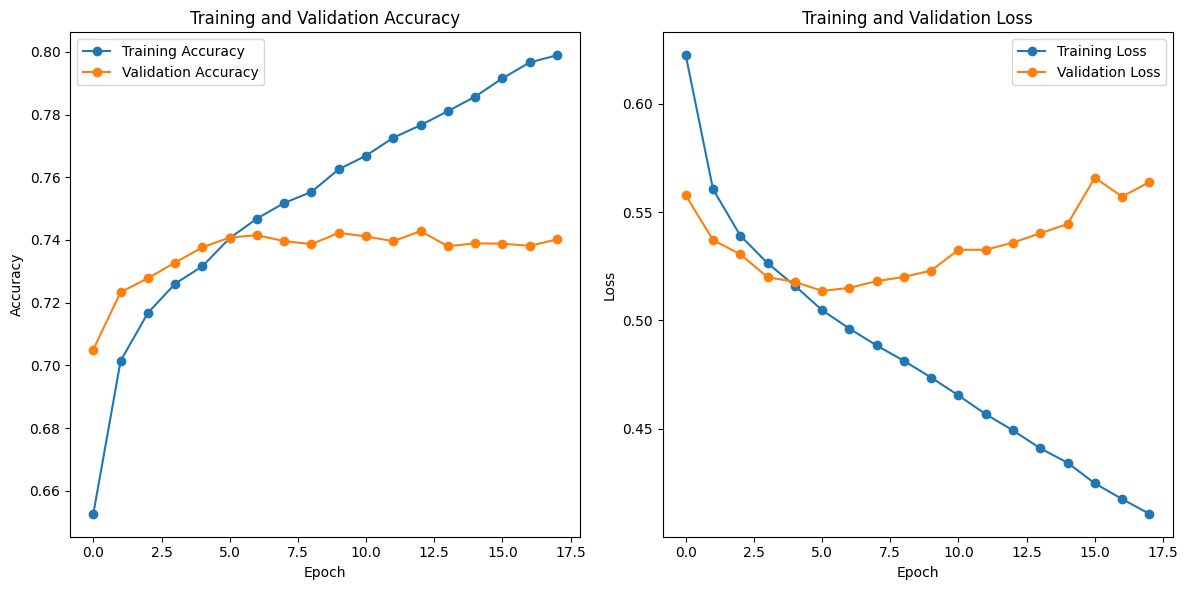

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.7333839726547665 Test Loss: 0.580739857502354


Accuracy: 0.73
F1 Score: 0.64
Precision: 0.6
Recall: 0.68

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.82      0.76      0.79     17246
        Hate       0.60      0.68      0.64      9084

    accuracy                           0.73     26330
   macro avg       0.71      0.72      0.71     26330
weighted avg       0.74      0.73      0.74     26330



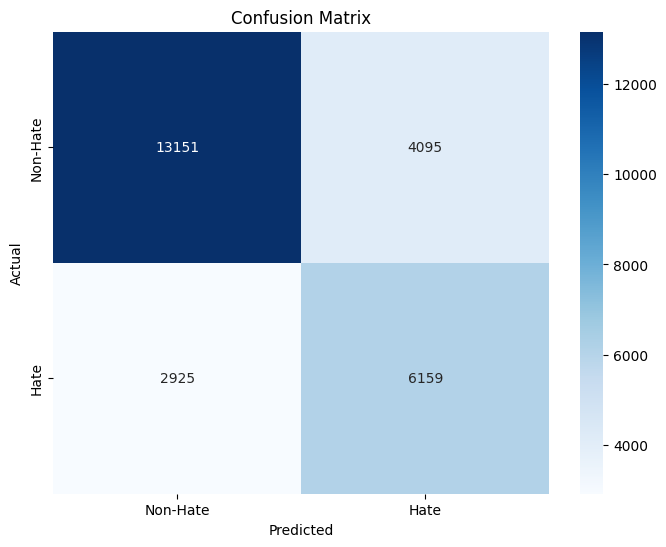

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Not Hate Speech 
Confidence: 0.81
